In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('CVD_cleaned.csv')

In [4]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [5]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


## Data Pre-processing

In [6]:
#Check the shape of data
df.shape

(308854, 19)

In [7]:
#Check for available null values in dataset
df.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [8]:
#There is no null values available in any column of the dataset
#therefore there is no need of data cleaning

In [9]:
#check for available columns
for i in df.columns:
    print(i)

General_Health
Checkup
Exercise
Heart_Disease
Skin_Cancer
Other_Cancer
Depression
Diabetes
Arthritis
Sex
Age_Category
Height_(cm)
Weight_(kg)
BMI
Smoking_History
Alcohol_Consumption
Fruit_Consumption
Green_Vegetables_Consumption
FriedPotato_Consumption


In [10]:
#dorping the unnessary columns
df.drop(columns = ['Height_(cm)', 'Weight_(kg)'], inplace = True)

In [11]:
df.shape

(308854, 17)

In [12]:
#check for unique values available in each columns
for i in df.columns:
    print(i,":")
    print("Total Unique Values are:",len(df[i].unique()))
    print(df[i].unique(),'\n')
    

General_Health :
Total Unique Values are: 5
['Poor' 'Very Good' 'Good' 'Fair' 'Excellent'] 

Checkup :
Total Unique Values are: 5
['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never'] 

Exercise :


Total Unique Values are: 2
['No' 'Yes'] 

Heart_Disease :
Total Unique Values are: 2
['No' 'Yes'] 

Skin_Cancer :
Total Unique Values are: 2
['No' 'Yes'] 

Other_Cancer :
Total Unique Values are: 2
['No' 'Yes'] 

Depression :
Total Unique Values are: 2
['No' 'Yes'] 

Diabetes :
Total Unique Values are: 4
['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy'] 

Arthritis :
Total Unique Values are: 2
['Yes' 'No'] 

Sex :
Total Unique Values are: 2
['Female' 'Male'] 

Age_Category :
Total Unique Values are: 13
['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29'] 

BMI :
Total Unique Values are: 3654
[14.54 28.29 33.47 ... 63.83 19.09 56.32] 

Smoking_History :
Total Unique Values are: 2
['Yes' 'No'] 

Alcohol_Consumption :
Total Unique Values are: 31
[ 0.  4.  3.  8. 30.  2. 12.  1.  5. 10. 20. 17. 16.  6. 25. 28. 15.  7.
  9. 24. 11. 29. 27. 14. 21. 23. 18. 26. 22. 13. 19.] 

Fruit_Consumpti

In [13]:
#replacing odd data of Diabetes
df['Diabetes'] = df['Diabetes'].map({'No, pre-diabetes or borderline diabetes':'pre-diabetes',
                                    'Yes, but female told only during pregnancy': 'pregnancy-diabetes',
                                    'Yes': 'Yes',
                                    'No': 'No'})

In [14]:
print('Diabetes:')
print("Total Unique Values are:",len(df['Diabetes'].unique()))
print(df['Diabetes'].unique(),'\n')

Diabetes:
Total Unique Values are: 4
['No' 'Yes' 'pre-diabetes' 'pregnancy-diabetes'] 



In [15]:
df.describe()

,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,28.626211,5.096366,29.835200,15.110441,6.296616
std,6.522323,8.199763,24.875735,14.926238,8.582954
min,12.020000,0.000000,0.000000,0.000000,0.000000
25%,24.210000,0.000000,12.000000,4.000000,2.000000
50%,27.440000,1.000000,30.000000,12.000000,4.000000
75%,31.850000,6.000000,30.000000,20.000000,8.000000
max,99.330000,30.000000,120.000000,128.000000,128.000000


In [16]:
#I can see that the diffrence between 'mean' values and 'max' values is huge.
#it represent that there are outlier presents in the dataset

### Removing Outliner

In [17]:
# columns with outliner presents
cols = ['BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

#IQR calculation
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

#threshold
threshold = 1.5

#lets find the index where the outliner lies
index = np.where((df[cols] < (Q1 - threshold * IQR)) | (df[cols] > (Q3 + threshold * IQR)))[0]

df = df.drop(df.index[index])
print("Outliner are droped")

Outliner are droped


In [18]:
df.describe()

,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,186777.000000,186777.000000,186777.000000,186777.000000,186777.000000
mean,28.303577,2.505287,18.446104,11.893440,4.899565
std,5.433758,3.777076,10.898445,9.604871,4.261893
min,12.870000,0.000000,0.000000,0.000000,0.000000
25%,24.370000,0.000000,8.000000,4.000000,2.000000
50%,27.550000,0.000000,16.000000,8.000000,4.000000
75%,31.750000,4.000000,30.000000,16.000000,8.000000
max,43.280000,15.000000,56.000000,44.000000,17.000000


In [19]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,24.37,Yes,0.0,8.0,4.0,0.0


## Data Analysis and Visualization

In [20]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'BMI', 'Smoking_History', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption'],
      dtype='object')

Text(0.5, 1.0, 'BMI Distribution')

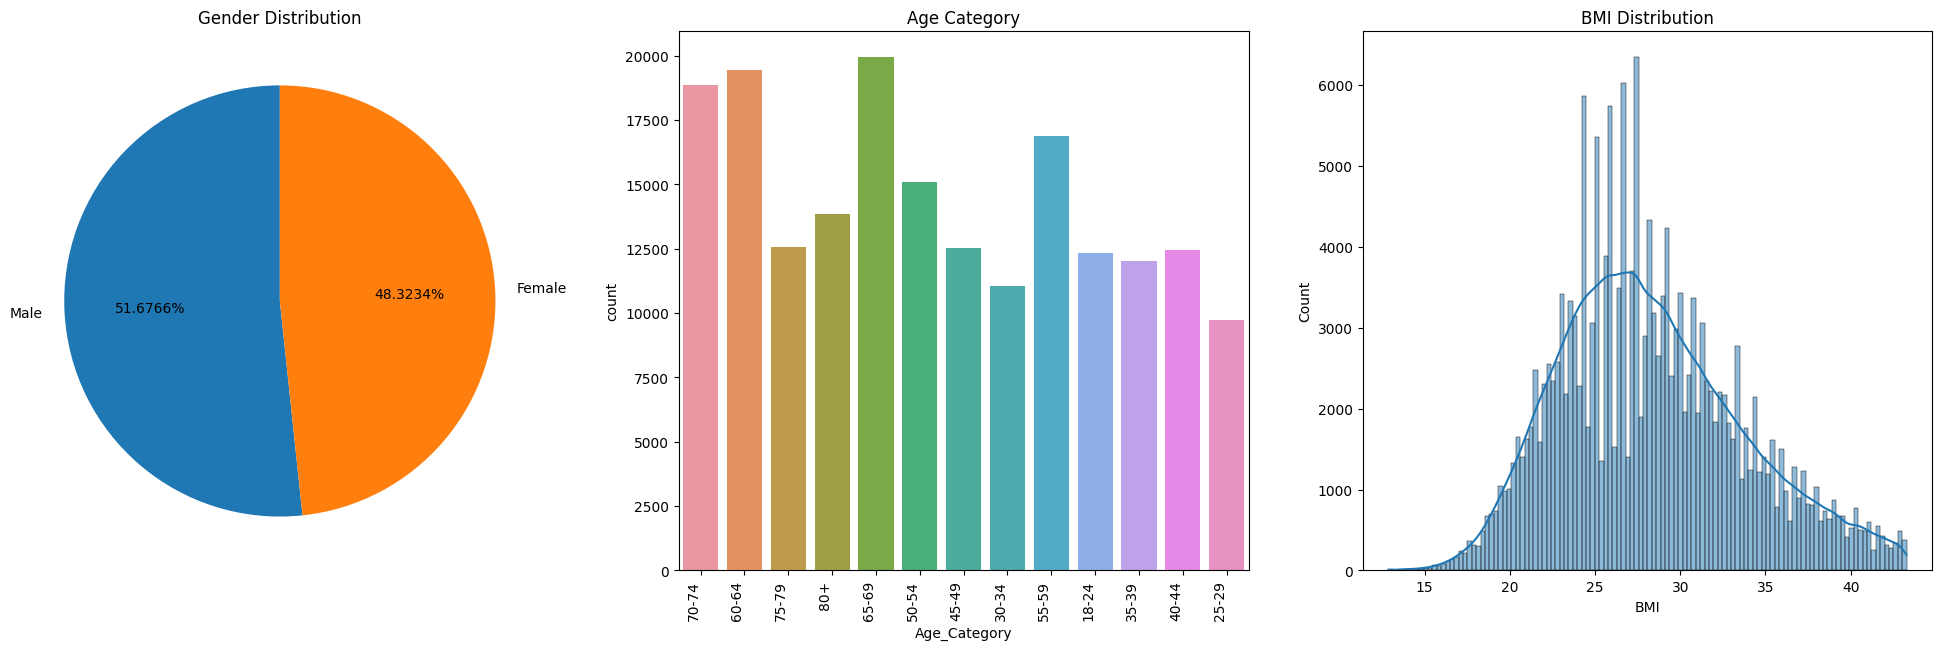

In [21]:
fig, ax = plt.subplots(1,3,figsize=(25, 7))

ax[0].pie(df['Sex'].value_counts(), labels = ['Male', 'Female'], autopct = '%1.4f%%', startangle = 90)
ax[0].set_title("Gender Distribution")

sns.countplot(x = 'Age_Category', data = df, ax = ax[1]).set_title('Age Category')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')

sns.histplot(x = 'BMI', data = df, ax = ax[2], kde = True).set_title('BMI Distribution')

Text(0.5, 1.0, 'General Health and Checkup')

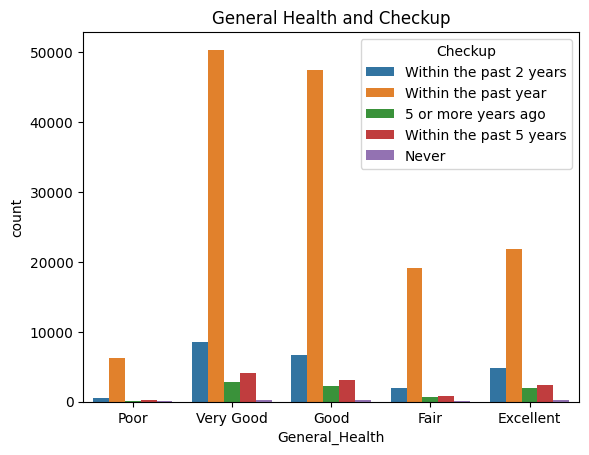

In [22]:
sns.countplot(x = 'General_Health', data = df, hue  = 'Checkup').set_title('General Health and Checkup')

Text(0.5, 1.0, 'General Health and Exercise')

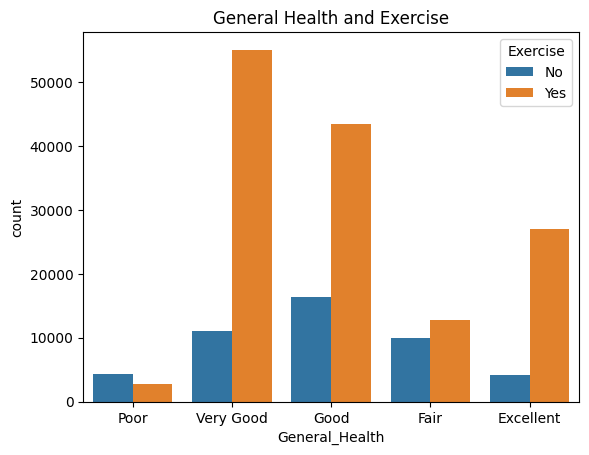

In [23]:
sns.countplot(x = 'General_Health', data = df, hue  = 'Exercise').set_title('General Health and Exercise')

### Food Consumption

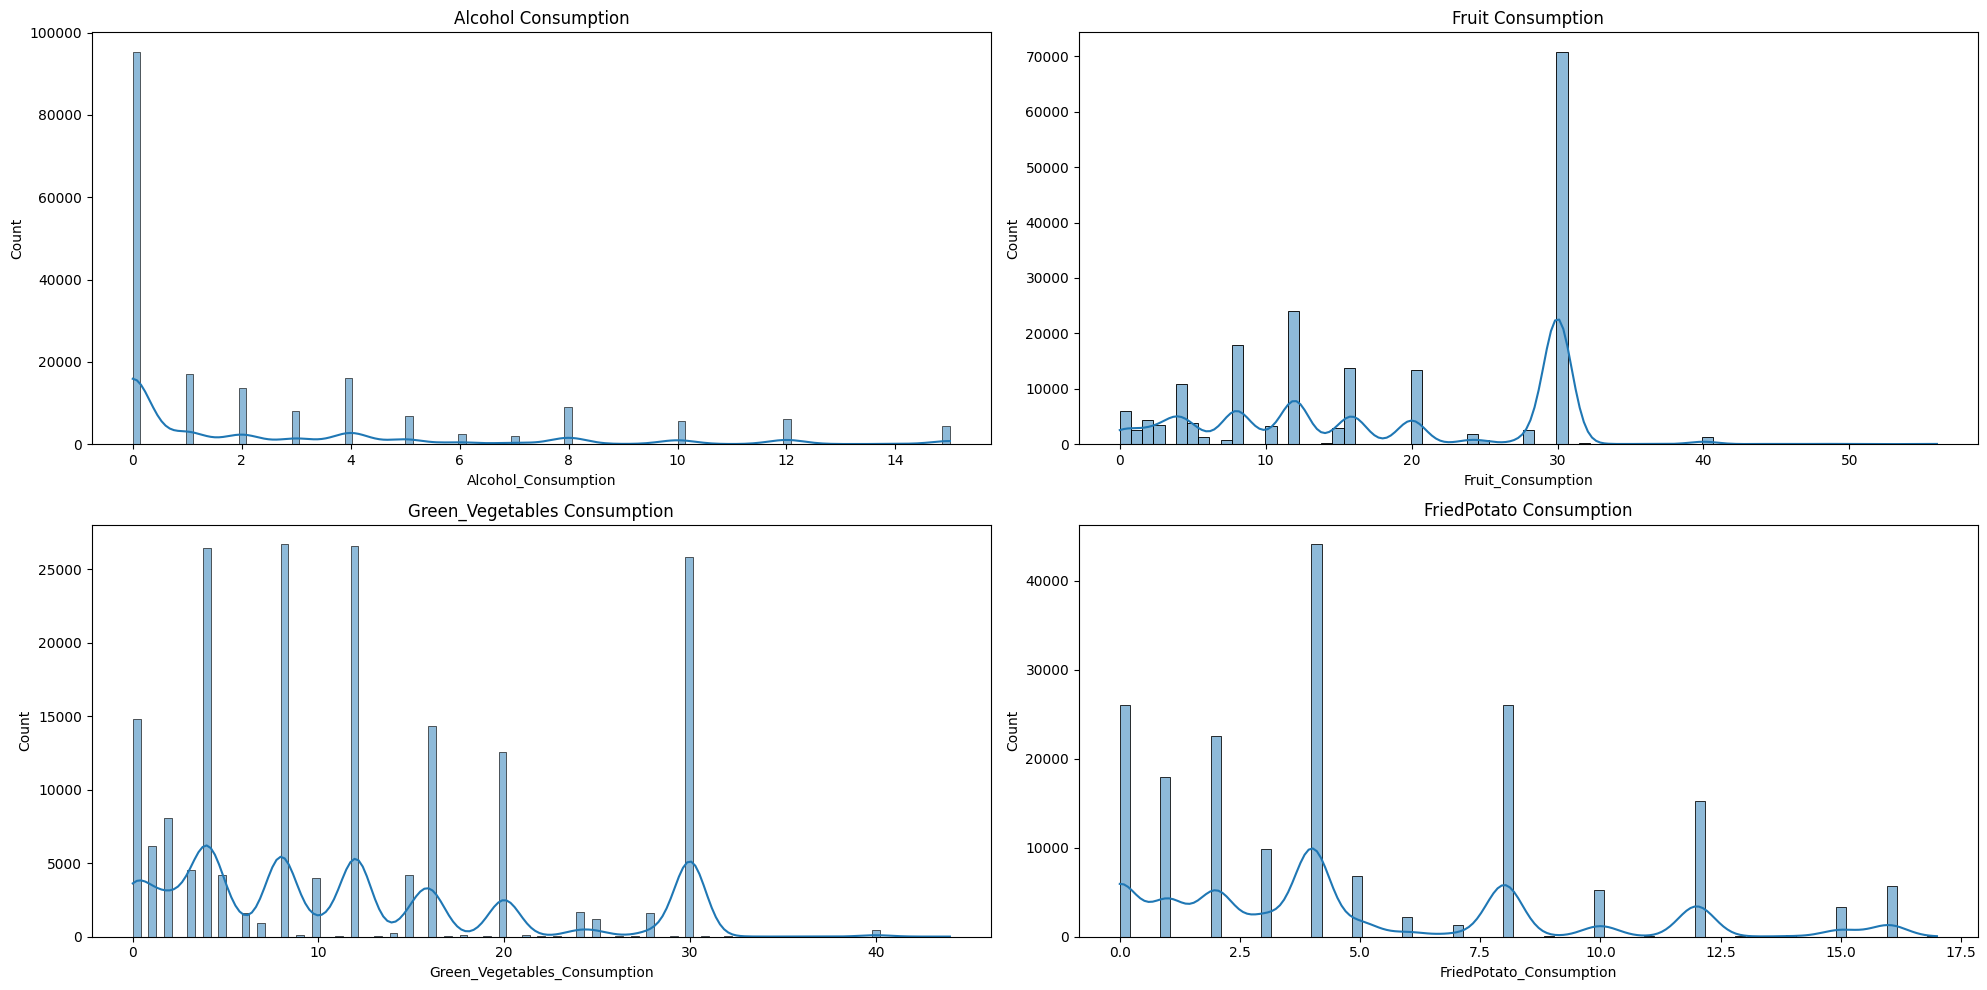

In [24]:
fig, ax = plt.subplots(2,2,figsize=(20, 10))
sns.histplot(x = 'Alcohol_Consumption', data = df, ax = ax[0,0], kde = True).set_title('Alcohol Consumption')
sns.histplot(x = 'Fruit_Consumption', data = df, ax = ax[0,1], kde = True).set_title('Fruit Consumption')
sns.histplot(x = 'Green_Vegetables_Consumption', data = df, ax = ax[1,0], kde = True).set_title('Green_Vegetables Consumption')
sns.histplot(x = 'FriedPotato_Consumption', data = df, ax = ax[1,1], kde = True).set_title('FriedPotato Consumption')
plt.tight_layout()

### Medical History

Text(0.5, 1.0, 'Arthritis')

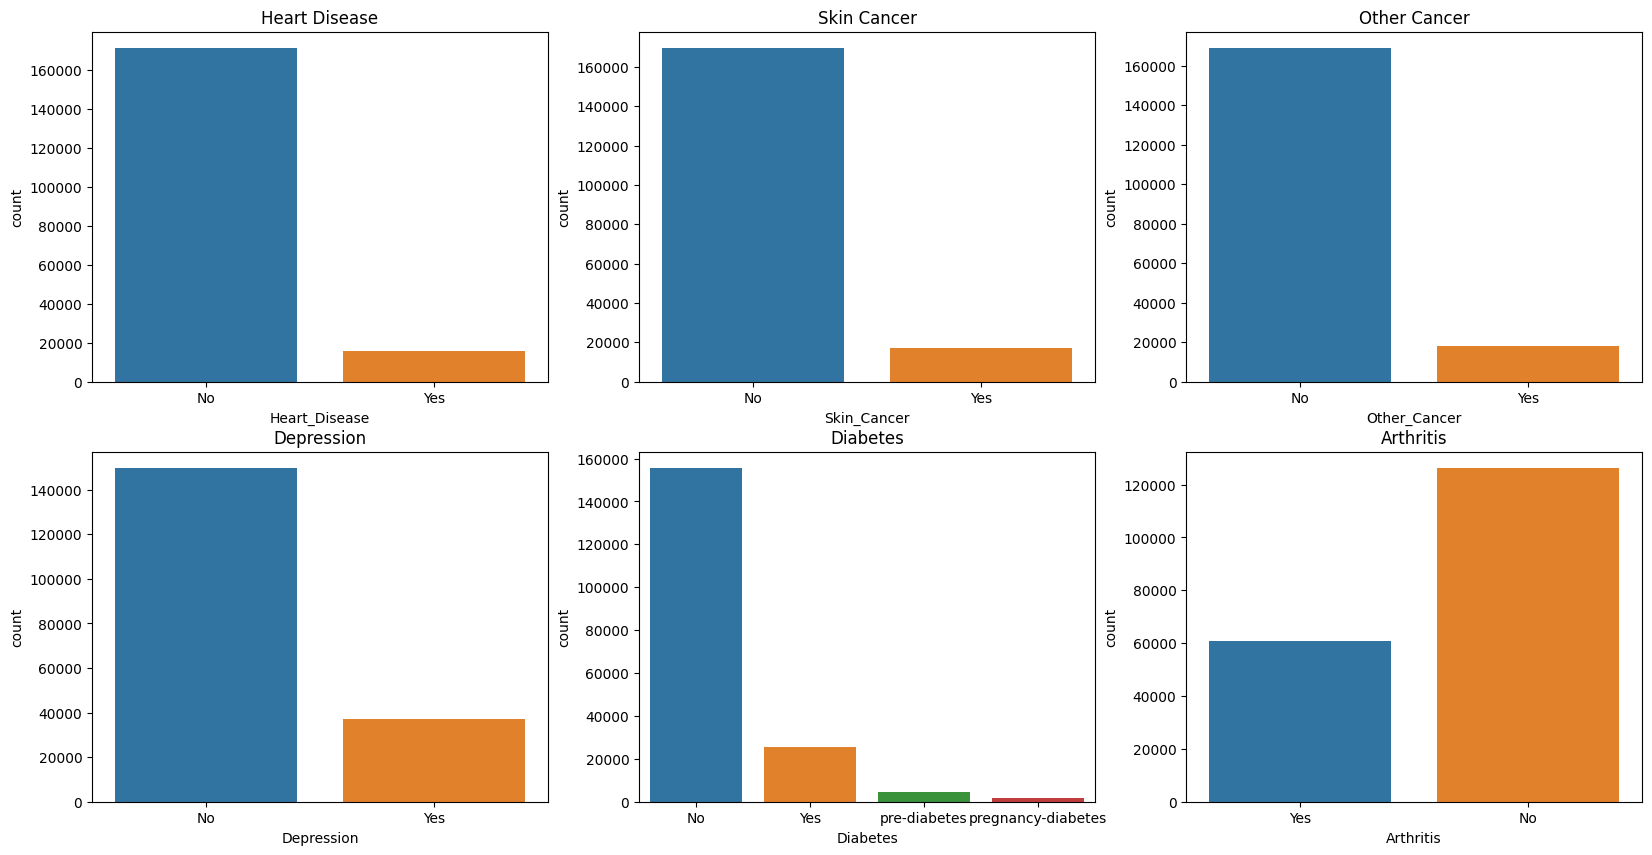

In [25]:
fig, ax = plt.subplots(2,3,figsize=(20, 10))
sns.countplot(x = 'Heart_Disease', data = df, ax = ax[0,0]).set_title('Heart Disease')
sns.countplot(x = 'Skin_Cancer', data = df, ax = ax[0,1]).set_title('Skin Cancer')
sns.countplot(x = 'Other_Cancer', data = df, ax = ax[0,2]).set_title('Other Cancer')
sns.countplot(x = 'Depression', data = df, ax = ax[1,0]).set_title('Depression')
sns.countplot(x = 'Diabetes', data = df, ax = ax[1,1]).set_title('Diabetes')
sns.countplot(x = 'Arthritis', data = df, ax = ax[1,2]).set_title('Arthritis')

### Patient's Smoking History

Text(0.5, 1.0, 'Smoking History')

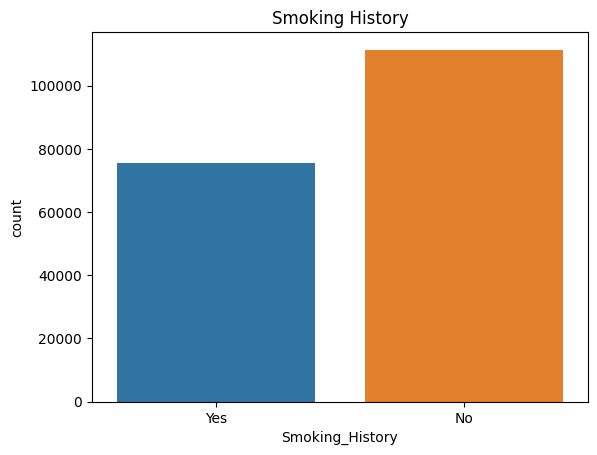

In [26]:
sns.countplot(x = 'Smoking_History', data = df ).set_title('Smoking History')

### Patient's Demographics and Heart Disease

In [27]:
# fig, ax = plt.subplots(1,3,figsize=(20, 5))
# sns.countplot(x = 'Sex', data = df, hue  = 'Heart_Disease', ax = ax[0]).set_title('Gender and Heart Disease')
# sns.countplot(x = 'Age_Category', data = df, ax = ax[1], hue = 'Heart_Disease').set_title('Age Distribution and Heart Disease')
# ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
# sns.histplot(x = 'BMI', data = df, ax = ax[2], kde = True, hue = 'Heart_Disease', multiple = 'stack').set_title('BMI Distribution and Heart Disease')

Text(0.5, 1.0, 'Gender and Heart Disease')

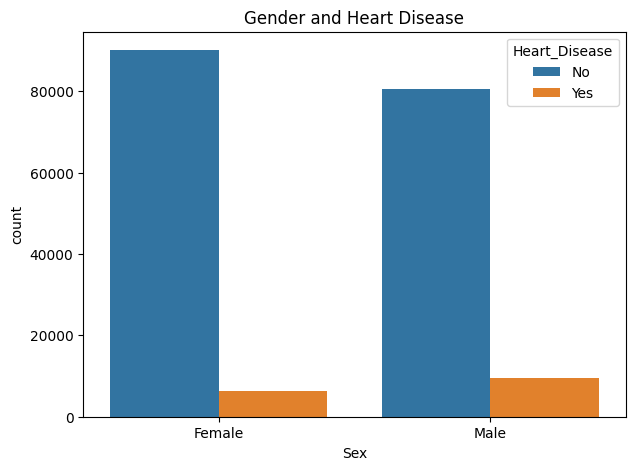

In [28]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'Sex', data = df, hue  = 'Heart_Disease').set_title('Gender and Heart Disease')

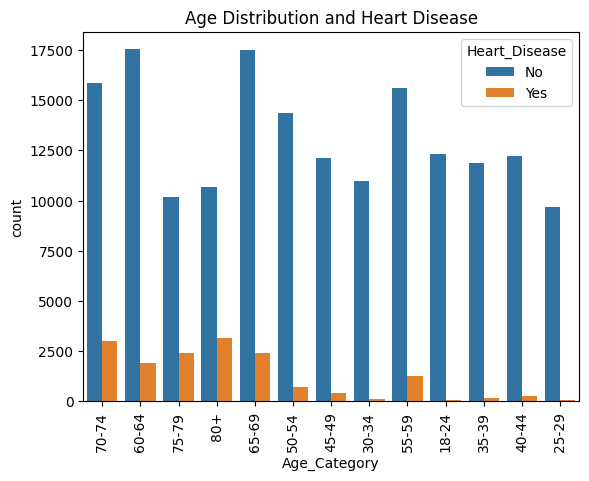

In [29]:
ax = sns.countplot(x = 'Age_Category', data = df, hue = 'Heart_Disease').set_title('Age Distribution and Heart Disease')
# plt.set_xticklabels(ax.get_xticklabels(), rotation=90)
# plt.setp(ax.get_xticklabels(), rotation=45)
plt.tick_params(axis= 'x', labelrotation=90)

Text(0.5, 1.0, 'BMI Distribution and Heart Disease')

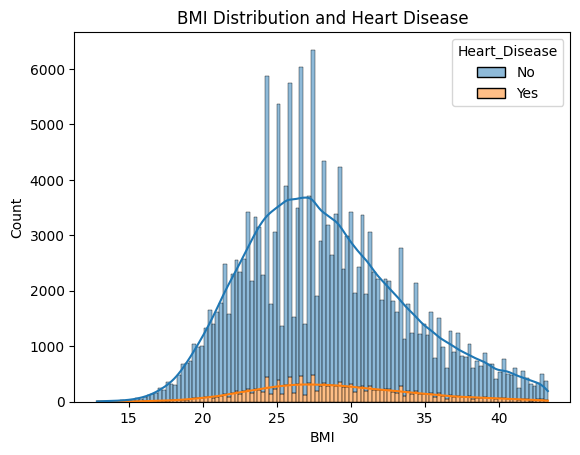

In [30]:
sns.histplot(x = 'BMI', data = df, kde = True, hue = 'Heart_Disease', multiple = 'stack').set_title('BMI Distribution and Heart Disease')

### General Health and Heart Disease

Text(0.5, 1.0, 'General Health and Heart Disease')

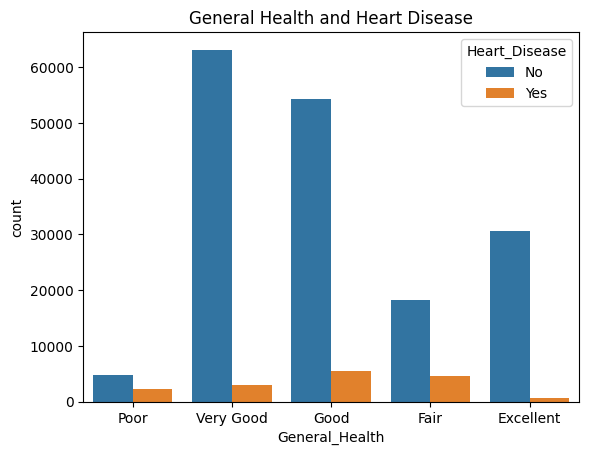

In [31]:
sns.countplot(x = 'General_Health', data = df, hue  = 'Heart_Disease').set_title('General Health and Heart Disease')

### Checkup and Heart Disease

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Within the past 2 years'),
  Text(1, 0, 'Within the past year'),
  Text(2, 0, '5 or more years ago'),
  Text(3, 0, 'Within the past 5 years'),
  Text(4, 0, 'Never')])

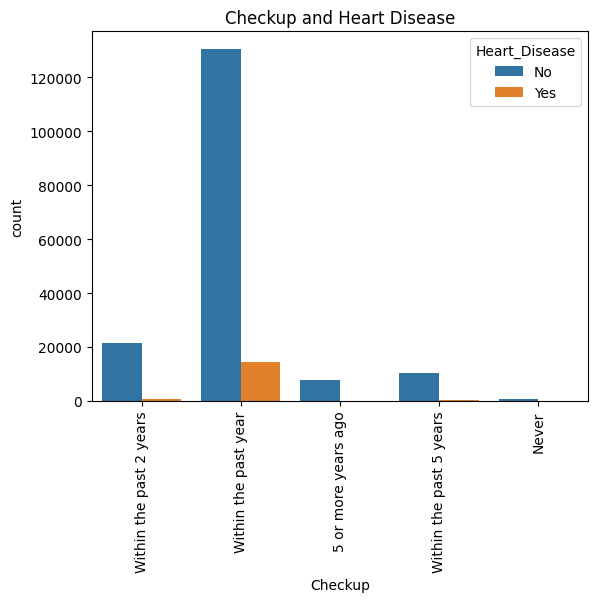

In [32]:
sns.countplot(x = 'Checkup', data = df, hue  = 'Heart_Disease').set_title('Checkup and Heart Disease')
plt.xticks(rotation=90)

### Excercise and Heart Disease

Text(0.5, 1.0, 'Exercise and Heart Disease')

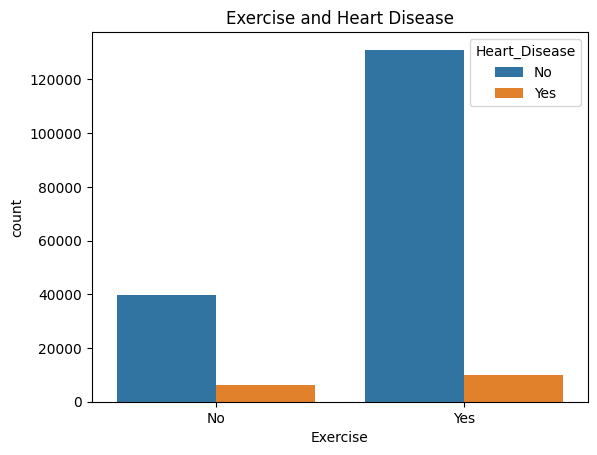

In [33]:
sns.countplot(x = 'Exercise', data = df, hue  = 'Heart_Disease').set_title('Exercise and Heart Disease')

### Food Consuption and Heart Disease

Text(0.5, 1.0, 'FriedPotato Consumption and Heart Disease')

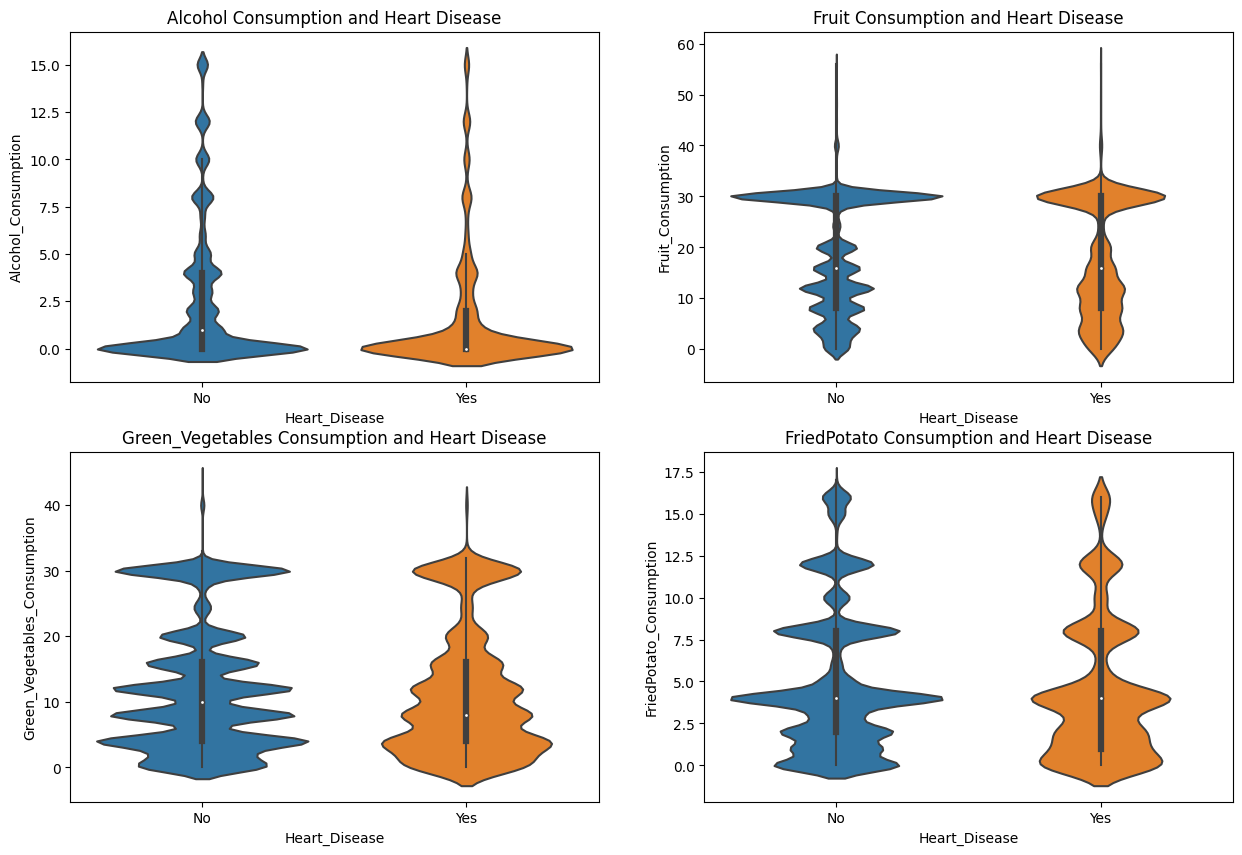

In [34]:
fig, ax = plt.subplots(2,2,figsize=(15, 10))
sns.violinplot(x = 'Heart_Disease', y = 'Alcohol_Consumption', data = df, ax = ax[0,0]).set_title('Alcohol Consumption and Heart Disease')
sns.violinplot(x = 'Heart_Disease', y = 'Fruit_Consumption', data = df, ax = ax[0,1]).set_title('Fruit Consumption and Heart Disease')
sns.violinplot(x = 'Heart_Disease', y = 'Green_Vegetables_Consumption', data = df, ax = ax[1,0]).set_title('Green_Vegetables Consumption and Heart Disease')
sns.violinplot(x = 'Heart_Disease', y = 'FriedPotato_Consumption', data = df, ax = ax[1,1]).set_title('FriedPotato Consumption and Heart Disease')

### Medical History and Heart Desease

Text(0.5, 1.0, 'Arthritis and Heart Disease')

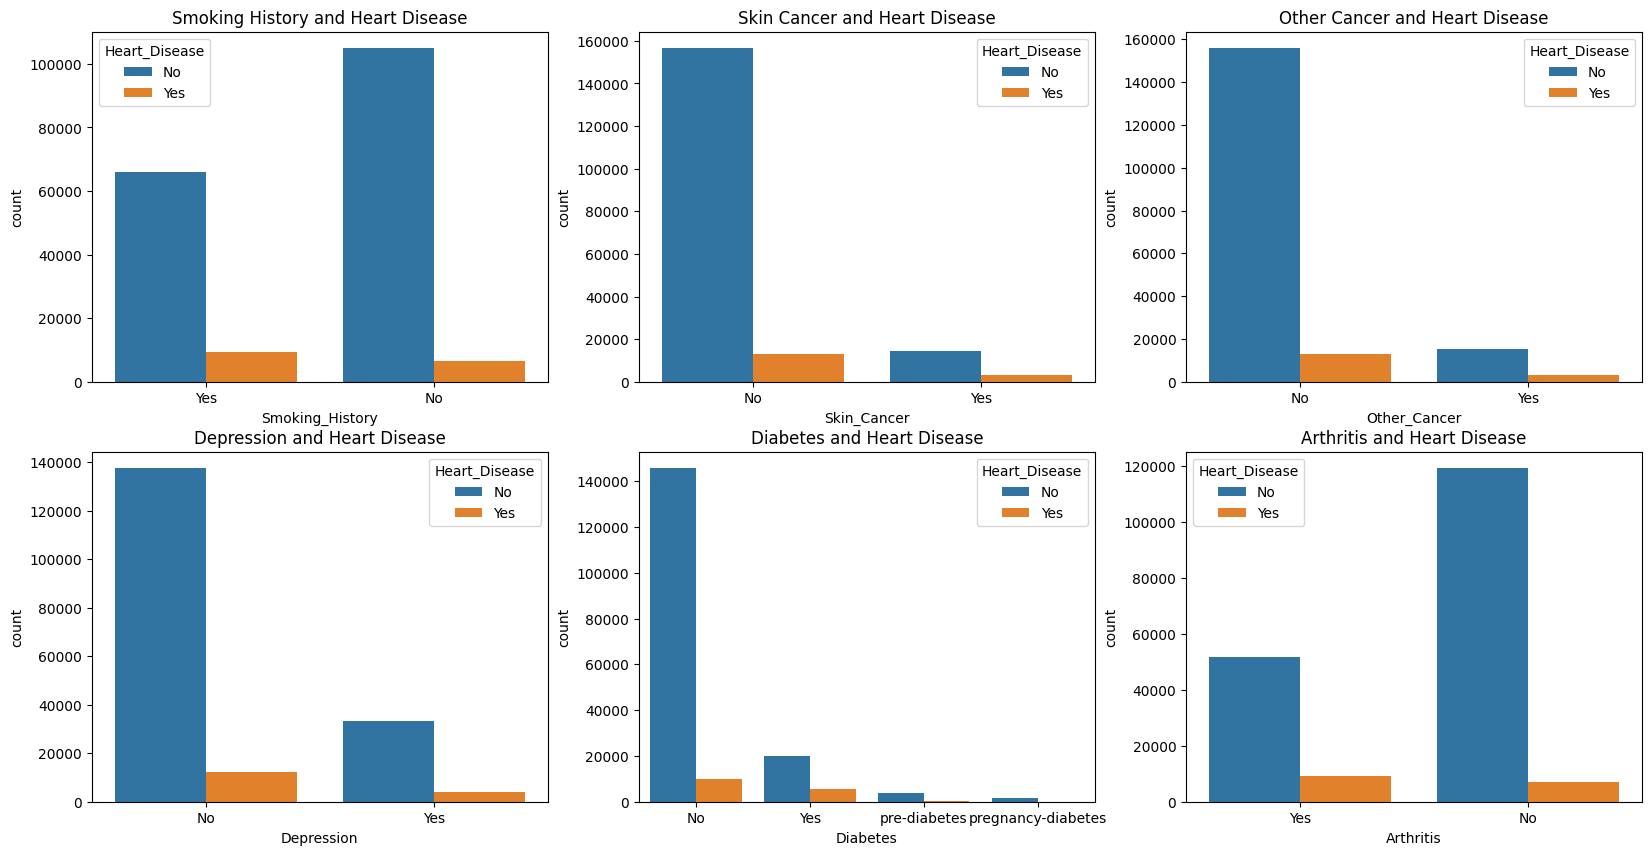

In [35]:
fig, ax = plt.subplots(2,3,figsize=(20, 10))
sns.countplot(x = 'Smoking_History', data = df, ax = ax[0,0], hue = 'Heart_Disease').set_title('Smoking History and Heart Disease')
sns.countplot(x = 'Skin_Cancer', data = df, ax = ax[0,1], hue = 'Heart_Disease').set_title('Skin Cancer and Heart Disease')
sns.countplot(x = 'Other_Cancer', data = df, ax = ax[0,2], hue = 'Heart_Disease').set_title('Other Cancer and Heart Disease')
sns.countplot(x = 'Depression', data = df, ax = ax[1,0], hue = 'Heart_Disease').set_title('Depression and Heart Disease')
sns.countplot(x = 'Diabetes', data = df, ax = ax[1,1], hue = 'Heart_Disease').set_title('Diabetes and Heart Disease')
sns.countplot(x = 'Arthritis', data = df, ax = ax[1,2], hue = 'Heart_Disease').set_title('Arthritis and Heart Disease')

# Data Pre-Processing_2

In [36]:
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

##### For trainning the model we have to convert all the abjects in to the numerical form.
##### and for that we'll use the Label Encoding method.

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
Cols = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']
LE = LabelEncoder()

for i in Cols:
    LE.fit(df[i])
    df[i] = LE.transform(df[i])
    print(i, df[i].unique(), '\n')   

General_Health [3 4 2 1 0] 

Checkup [2 4 0 3 1] 

Exercise [0 1] 

Heart_Disease [0 1] 

Skin_Cancer [0 1] 

Other_Cancer [0 1] 

Depression [0 1] 

Diabetes [0 1 2 3] 

Arthritis [1 0] 

Sex [0 1] 

Age_Category [10  8 11 12  9  6  5  2  7  0  3  4  1] 

Smoking_History [1 0] 



## Coorelation Matrix Heatmap

<Axes: >

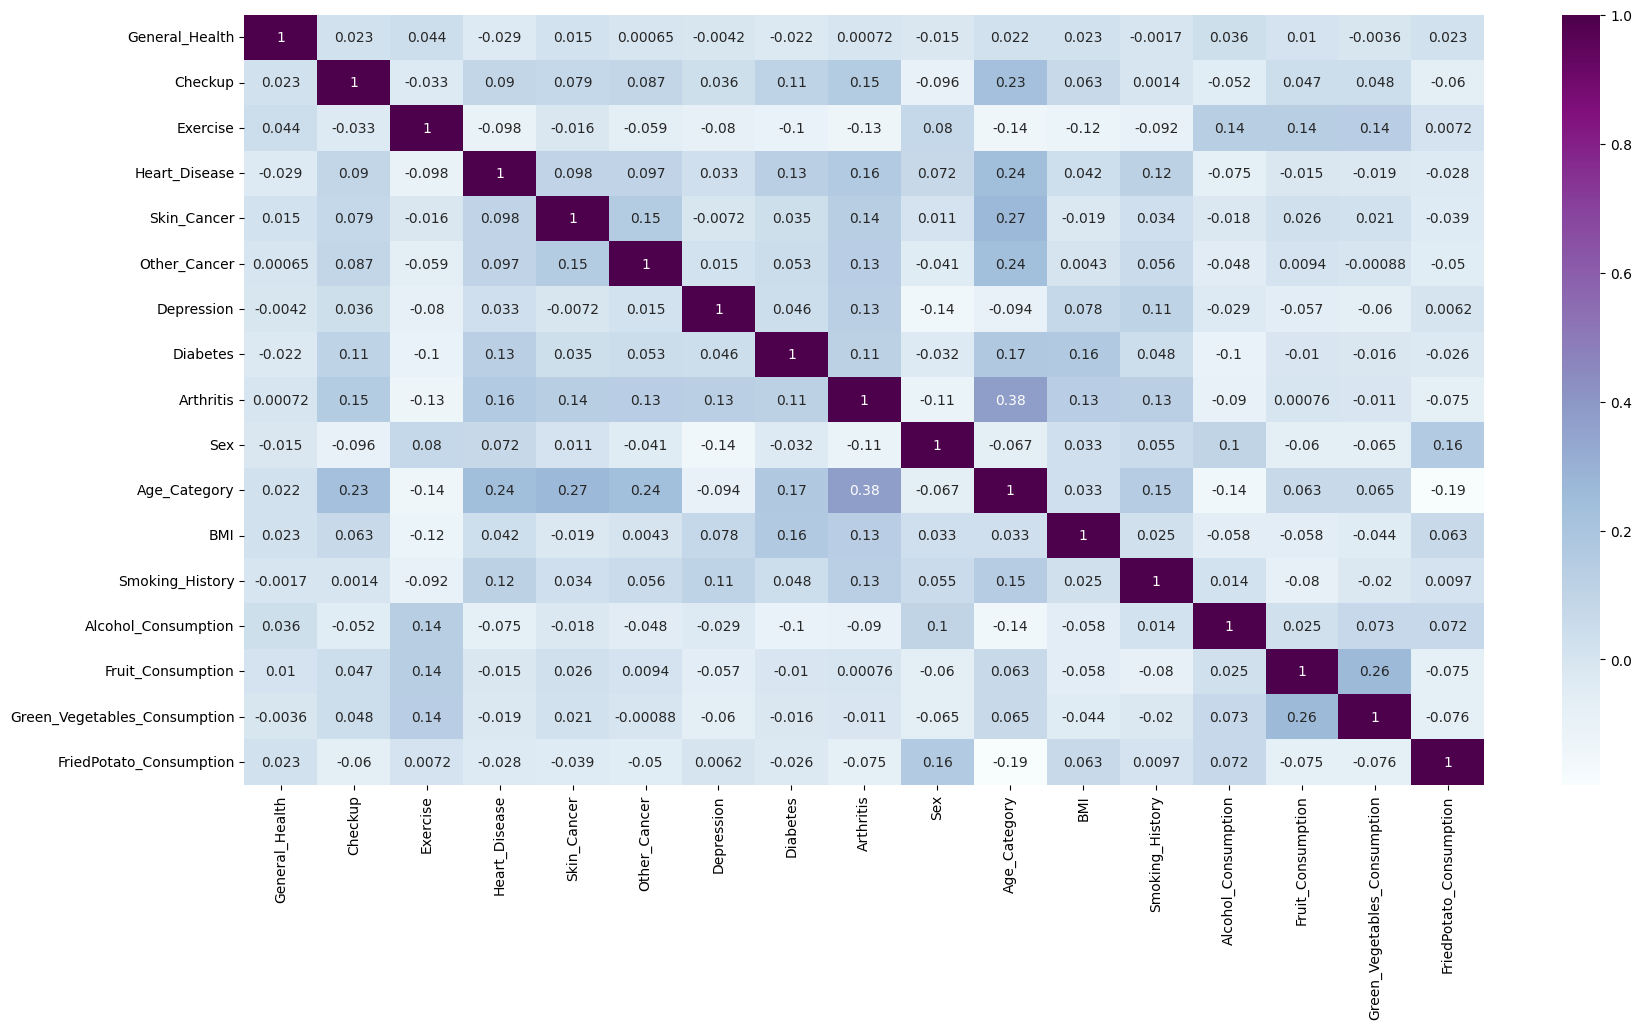

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, cmap = 'BuPu')

## Split the data in Train-Test

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['Heart_Disease']), df['Heart_Disease'], test_size = 0.2, random_state = 0)

### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
DTC = DecisionTreeClassifier(random_state = 0, max_depth = 12, min_samples_leaf = 2, min_samples_split = 2, class_weight = 'balanced')

In [43]:
DTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=2, random_state=0)

In [44]:
DTC.score(X_train, y_train)

0.7317512264005729

In [45]:
DTC_pred = DTC.predict(X_test)

Text(0.5, 1.0, 'Decision Tree')

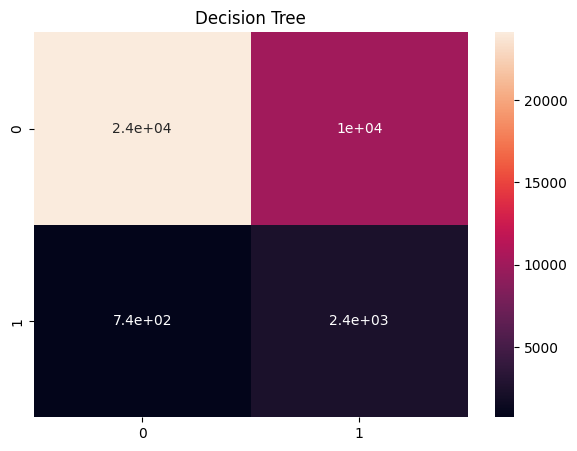

In [46]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, DTC_pred), annot = True).set_title("Decision Tree")

### Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
RFC = RandomForestClassifier(random_state = 0, max_features = "sqrt", n_estimators = 200, class_weight='balanced')

In [49]:
RFC.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=0)

In [50]:
RFC.score(X_train, y_train)

0.9999866150005688

In [51]:
RFC_pred = RFC.predict(X_test)

Text(0.5, 1.0, 'Random Forest Classifier')

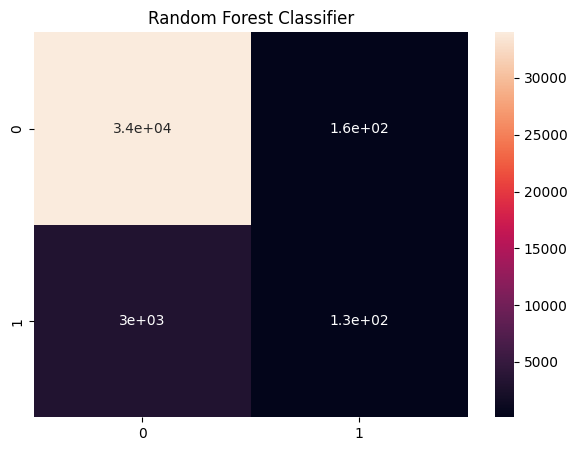

In [52]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, RFC_pred), annot = True).set_title("Random Forest Classifier")

### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
LR = LogisticRegression()

In [55]:
LR.fit(X_train, y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
LR.score(X_train,y_train)

0.914008071154657

In [57]:
LR_pred = LR.predict(X_test)

Text(0.5, 1.0, 'Logistic Regression')

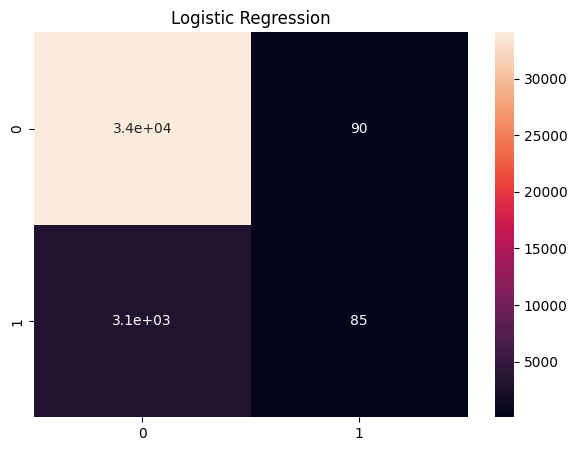

In [58]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, LR_pred), annot = True).set_title("Logistic Regression")

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Decision Tree')
print('Accuracy Score :', accuracy_score(y_test, DTC_pred))
print('Precision Score:', precision_score(y_test, DTC_pred))
print('Recall Score   :', recall_score(y_test, DTC_pred))
print('F1 Score       :', f1_score(y_test, DTC_pred))

Decision Tree
Accuracy Score : 0.710889816896884
Precision Score: 0.1950731824362153
Recall Score   : 0.7681889763779528
F1 Score       : 0.3111366245694604


In [60]:
print('Random Forest')
print('Accuracy Score :' ,accuracy_score(y_test, RFC_pred))
print('Precision Score:' ,precision_score(y_test, RFC_pred))
print('Recall Score   :' ,recall_score(y_test, RFC_pred))
print('F1 Score       :' ,f1_score(y_test, RFC_pred))                                 

Random Forest
Accuracy Score : 0.9140432594496198
Precision Score: 0.4379310344827586
Recall Score   : 0.04
F1 Score       : 0.07330447330447332


In [61]:
print('Logistic Regression')
print('Accuracy Score :' ,accuracy_score(y_test, LR_pred))
print('Precision Score:' ,precision_score(y_test, LR_pred))
print('Recall Score   :' ,recall_score(y_test, LR_pred))
print('F1 Score       :' ,f1_score(y_test, LR_pred))

Logistic Regression
Accuracy Score : 0.9148731127529715
Precision Score: 0.4857142857142857
Recall Score   : 0.026771653543307086
F1 Score       : 0.05074626865671642
